## PyMC

<img src="https://raw.githubusercontent.com/pymc-devs/brand/main/pymc/pymc_logos/PyMC_banner.svg" width=1200>



In [1]:
#!pip install pytensor pymc -q #colab already installed

In [7]:
#https://www.pymc.io/welcome.html

In [8]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Generate Data
***

# $y_{true}=mx+b$
# $y=y_{true} + N(0,\sigma)$
***

### Fit 10 points

In [10]:
true_slope = 5
true_intercept = 10
true_sigma = 1

num_points = 10

x_vals = np.linspace(0, 1, num_points)
true_y_vals = true_slope * x_vals + true_intercept
y_vals = true_y_vals + np.random.normal(scale=true_sigma, size=num_points)

true_params = {'slope': true_slope, 'intercept': true_intercept, 'sigma': true_sigma}

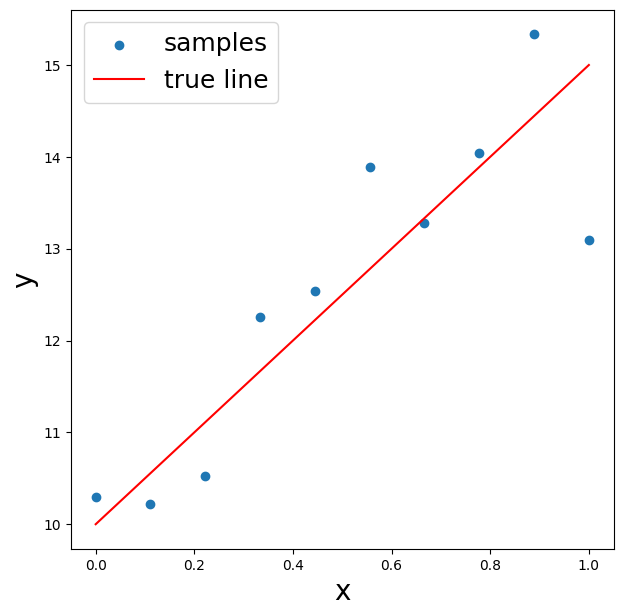

In [4]:
plt.figure(figsize=(7,7))
p1 = plt.scatter(x_vals, y_vals)
p2, = plt.plot(x_vals, true_y_vals, color='r')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend((p1, p2), ('samples', 'true line'), fontsize=18)

# Fit a Usual Linear Model

In [11]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(x_vals.reshape(-1,1), y_vals)
preds = clf.predict(x_vals.reshape(-1,1))
resids = preds - y_vals

print('True Model:')
print('y_true = %s*x + %s'%(true_slope, true_intercept))
print('True sigma: %s\n'%true_params['sigma'])

print('Estimated Model:')
print('y_hat = %s*x + %s'%(clf.coef_[0], clf.intercept_))
print('Sd Residuals: %s'%(resids.std()))

mle_estimates = {'slope': clf.coef_[0], 'intercept': clf.intercept_, 'sigma': resids.std()}

True Model:
y_true = 5*x + 10
True sigma: 1

Estimated Model:
y_hat = 6.483581282239156*x + 9.619827975711345
Sd Residuals: 0.8417836811342785


# Bayesian Analysis with PyMC3
***

# Priors:
## $m \sim N(0,20)$
## $b \sim N(0,20)$
## $\sigma \sim Exp(1)$
***

# Likelihood:
## $y|m,b,\sigma \sim N(mx+b, \sigma)$
***

# Posterior
## $m,b,\sigma | y \sim ?$
## $P(m,b,\sigma|y) \propto P(y|m,b,\sigma) \times P(m) \times P(b) \times P(\sigma)$
***

In [6]:
with pm.Model() as model:
    #priors
    sigma = pm.Exponential("sigma", lam=1.0)
    intercept = pm.Normal("intercept", mu=0, sigma=20)
    slope = pm.Normal("slope", mu=0, sigma=20)

    #Likelihood
    likelihood = pm.Normal("y", mu=slope*x_vals + intercept, sigma=sigma, observed=y_vals)

    #posterior
    trace = pm.sample(1000, cores=4)

C:\Users\ritvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  
C:\Users\ritvik\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
C:\Users\ritvik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

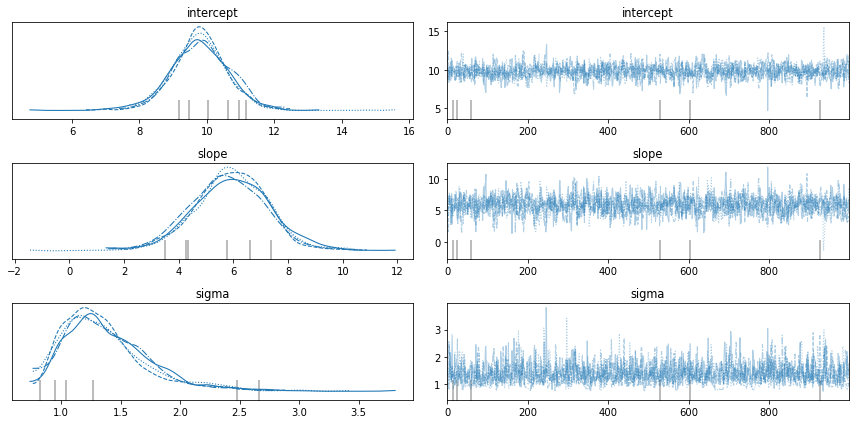

In [ ]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout()

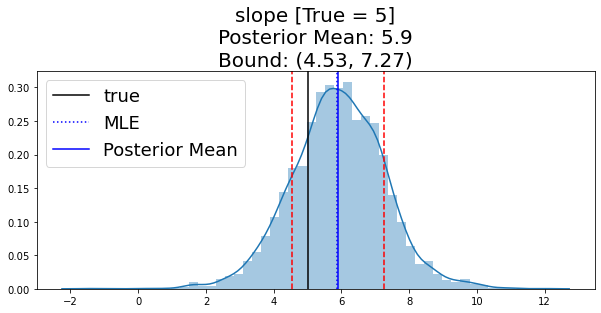

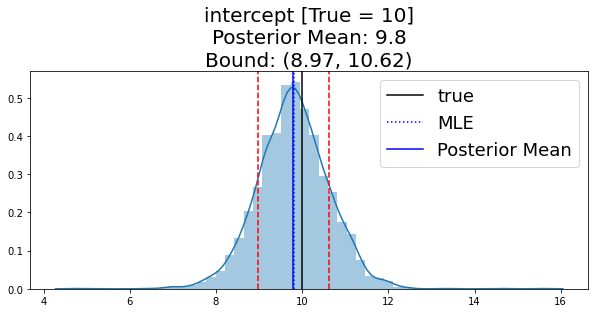

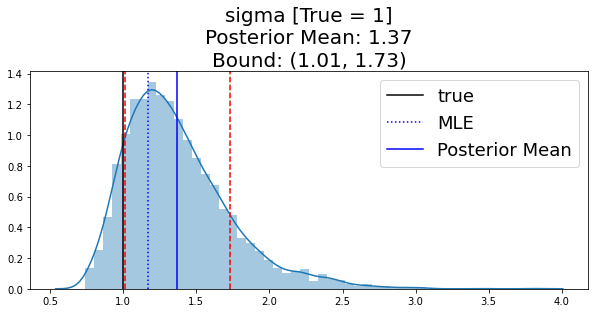

In [ ]:
for var in ['slope', 'intercept', 'sigma']:
    plt.figure(figsize=(10,4))
    vals = trace.get_values(var)
    mean, lower, upper = round(vals.mean(),2), round(vals.mean()-vals.std(),2), round(vals.mean()+vals.std(),2)
    sns.distplot(vals)
    posterior_est = plt.axvline(mean, color='b')
    mle_est = plt.axvline(mle_estimates[var], color='b', linestyle='dotted')
    plt.axvline(lower, color='r', linestyle='--')
    plt.axvline(upper, color='r', linestyle='--')
    plt.title('%s [True = %s]\nPosterior Mean: %s\nBound: (%s, %s)'%(var,true_params[var],mean,lower,upper), fontsize=20)
    true_val = plt.axvline(true_params[var], color='k')

    plt.legend((true_val, mle_est, posterior_est), ('true', 'MLE', 'Posterior Mean'), fontsize=18)

    plt.show()

In [6]:
#https://bpostance.github.io/posts/pymc3-predictions/

## Probabilistic fatigue

In [5]:
#https://discourse.pymc.io/t/help-with-gp-modelling/9630

## Pymc-learn
https://pymc-learn.readthedocs.io/en/latest/install.html

In [2]:
!pip install git+https://github.com/pymc-learn/pymc-learn -q

  Preparing metadata (setup.py) ... done


In [4]:
# from pmlearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(X, y)

In [19]:
# # For regression using Bayesian Nonparametrics
# from sklearn.datasets import make_friedman2
# from pmlearn.gaussian_process import GaussianProcessRegressor
# from pmlearn.gaussian_process.kernels import DotProduct, WhiteKernel

# X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
# kernel = DotProduct() + WhiteKernel()
# gpr = GaussianProcessRegressor(kernel=kernel).fit(X, y)
# gpr.score(X, y)